<div >
<div style='width:120px; height:120px;float: left;margin-right:25%'>
    <img src='http://www.dot.uff.br/sites/all/themes/dot/logo.png' width="120px">
</div>
<div style='width:120px; height:120px;float: left;margin-right:25%'>
    <img src='https://logodownload.org/wp-content/uploads/2015/03/uff-logo-5.png' width="120px">    
</div>
<div style='width:120px; height:120px;float: left;'>
    <img src='http://gcr.sites.uff.br/wp-content/uploads/sites/221/2019/06/logo_giecar3_4_azul.png' width="120px">
</div>
</div>

<br><br><br><br><br><br><br><br>
<center><h1> - Curso de Machine Learning - </h1></center>
<h3>K-means, perceptron em dados de poços</h3>
<h3>Tópico 0: Acessando e trabalhando com dados de poços</h3>
<h3>palestrante: Mario Martins Ramos - mario_martins@id.uff.br</h3>
----------------------------------------------------------------------------------------------------------------------------------
<br>referências:
<br><b>k-means:</b>
<br><a href="https://scholar.google.co.in/citations?user=1jzAmyAAAAAJ&hl=en">Anuradha Bhatia</a>
<br><a href="https://www.youtube.com/watch?v=wt-X61BnUCA&t=150s">Anuradha Bhatia - vídeo</a>
<br><b>Perceptron:</b>
<br>Sebastian Raschka - Python Machine Learning (Livro)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = 3.2
print(x1)

x2 = np.linspace(0,1,10)
print('x2 =',x2)

3.2
x2 = [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


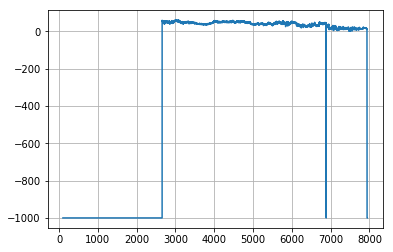

In [2]:
import pandas as pd
##### Poço DP1:

### Importando o arquivo para as curvas

###NOTA:
# skiprows=42 -> Ignora o cabeçalho, so le a partir da 42 linha do arquivo
# .T -> Retorna a matriz transposta

url = 'k-means e perceptron/Wells/DrewPt1/LAS/DP1.LAS'

cabecalho = ['PROF','GR', 'RHOB', 'NPHI']
data_DP1 = pd.read_csv(url, usecols=(0,5,8,9), header=42, sep='\s+', names=cabecalho)

### (0,5,7) Acessa curvas especificas:
# - 0 = profundidade
# - 5 = raios gama (GR)
# - 8 = densidade (bulk) RHOb
# - 9 = porosidade neutronica/Neutrao (NPHI)

#---------------------------------------------------------------------------------#
# Grafico para visualizar

plt.plot(data_DP1['PROF'],data_DP1['NPHI']) #! testar valores 1 = GR, e os outros?
#plt.ylim(0,100)
plt.grid()
plt.show()

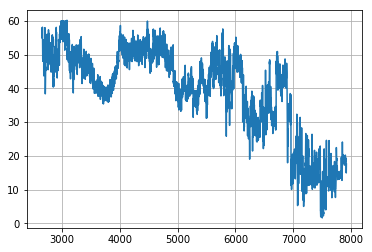

In [3]:
# Remover valores nulos -999.000 no pandas

DP1 = data_DP1.loc[(data_DP1['GR'] != -999.00000) & 
                  (data_DP1['RHOB']  != -999.00000) &
                  (data_DP1['NPHI']  != -999.00000)]

################################
prof_DP1 = np.copy(DP1['PROF'])
GR_DP1 = np.copy(DP1['GR'])
RHOB_DP1 = np.copy(DP1['RHOB'])
NPHI_DP1 = np.copy(DP1['NPHI'])
################################

plt.plot(prof_DP1,NPHI_DP1)
plt.grid()
plt.show()

<big><big><big>$IGR = \frac{ GR_i - GR_{min} }{ GR_{max} - GR_{min} }$<br>
__________________________________________
    
$\phi_{D} = \frac{ \rho_{matriz} - \rho_i }{ \rho_{matriz} - \rho_{fluído} }$

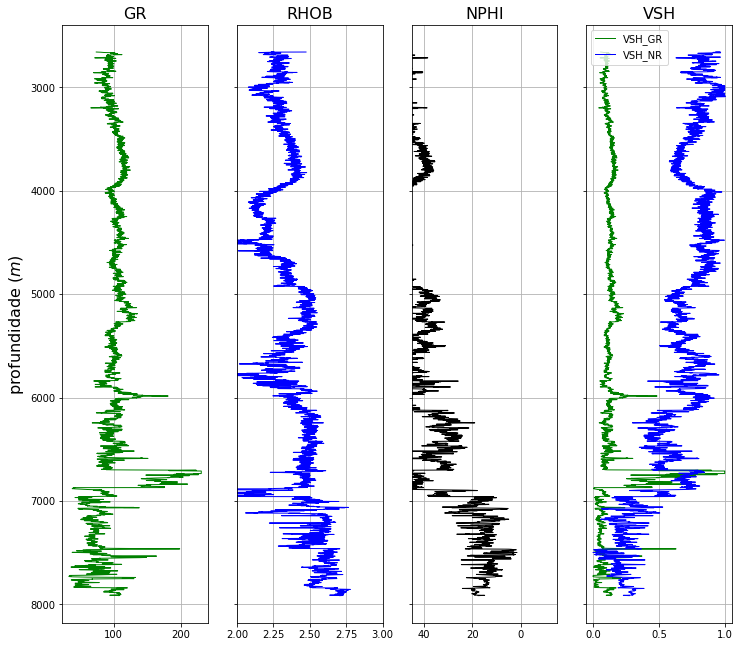

In [4]:
### calculando o VSH para as duas curvas:

rho_ma = 2.65 # densidade da matriz
rho_fl = 1.10 # densidade do fluído
rho_sh = 2.70 # densidade do folhelho

##############################
VSH_GR_DP1   = [] # argilosidade via perfil de raios gama
VSH_ND_DP1   = [] # argilosidade via perfis NPHI e DPHI
VSH_ND_DP1_0 = [] # argilosidade NPHI e DPHI normalizada
##############################

min_GR_DP1 = min(GR_DP1) # valor mínimo da argilosidade no perfil de raios-gama (GR)
max_GR_DP1 = max(GR_DP1) # valor máximo da argilosidade no perfil de raios-gama (GR)

##############################

for i in range (len(prof_DP1)):
    IGR0 = (GR_DP1[i] - min_GR_DP1)/(max_GR_DP1 - min_GR_DP1) # Calculo da Argilosidade (basica, Schlumberger) 
    
    vsh_gr = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
    VSH_GR_DP1.append(vsh_gr)
    
    #_____________________________________________________#
    
    phi_d = ((rho_ma - RHOB_DP1[i])/(rho_ma - rho_fl))
    VSH_ND_DP1_0.append(NPHI_DP1[i] - phi_d) # calculo da argilosidade pela diferenca entre NPHI e DPHI
    
##############################
    
min_GR_DP1_n = min(VSH_ND_DP1_0) # n de normalizada
max_GR_DP1_n = max(VSH_ND_DP1_0)

##############################
    
for i in range (len(prof_DP1)):
    VSH_ND_DP1.append((VSH_ND_DP1_0[i] - min_GR_DP1_n)/(max_GR_DP1_n - min_GR_DP1_n))
    
#---------------------------------------------------------------------------------#
### Graficos

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4) # 4 cruvas = 4 subplots
fig.set_size_inches(12, 11) # tamanho da figura | polegadas

#_____________________________________________________#

ax1.plot(GR_DP1,prof_DP1,'-g',linewidth = 1,label='GR')
# (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
ax1.invert_yaxis()
# inverte o eixo y
ax1.grid()
# adiciona o 'grid' ou malha de fundo
ax1.set_ylabel('profundidade ($m$)', fontsize=16)
# o que vai ser escrito no eixo y
ax1.set_title('GR', fontsize=16)
# titulo do 'track' ou do grafico com tamanho de letra 16

#_____________________________________________________#

ax2.plot(RHOB_DP1,prof_DP1,'-b',linewidth = 1,label='RHOB')
ax2.invert_yaxis()
ax2.grid()
ax2.set_yticklabels([]) # remove as profundidades do eixo y
ax2.set_title('RHOB', fontsize=16)
ax2.set_xlim(2,3)

#_____________________________________________________#

ax3.plot(NPHI_DP1,prof_DP1,'-k',linewidth = 1,label='NPHI')
ax3.invert_yaxis()
ax3.grid()
ax3.set_yticklabels([])
ax3.set_title('NPHI', fontsize=16)
ax3.set_xlim(45,-15)

#_____________________________________________________#

ax4.plot(VSH_GR_DP1,prof_DP1,'-g',linewidth = 1,label='VSH_GR')
ax4.plot(VSH_ND_DP1,prof_DP1,'-b',linewidth = 1,label='VSH_ND')
ax4.invert_yaxis()
ax4.grid()
ax4.set_yticklabels([])
ax4.set_title('VSH', fontsize=16)
# adiciona a posicao da legenda
ax4.legend(loc=2)

plt.show()

In [5]:
def curvas(caminho):
    url = caminho

    cabecalho = ['PROF','GR', 'RHOB', 'NPHI']
    data_DP1 = pd.read_csv(url, usecols=(0,5,8,9), header=42, sep='\s+', names=cabecalho)

    #______________________________________________________________________________#
    # Remover valores nulos -999.000

    DP1 = data_DP1.loc[(data_DP1['GR'] != -999.00000) & 
                      (data_DP1['RHOB']  != -999.00000) &
                      (data_DP1['NPHI']  != -999.00000)]

    ##############################
    prof_DP1 = np.copy(DP1['PROF'])
    GR_DP1 = np.copy(DP1['GR'])
    RHOB_DP1 = np.copy(DP1['RHOB'])
    NPHI_DP1 = np.copy(DP1['NPHI'])
    ##############################

    #______________________________________________________________________________#

    ### calculando o VSH para as duas curvas:

    rho_ma = 2.65 # densidade da matriz
    rho_fl = 1.10 # densidade do fluído
    rho_sh = 2.70 # densidade do folhelho

    ##############################
    VSH_GR_DP1   = [] # argilosidade via perfil de raios gama
    VSH_ND_DP1   = [] # argilosidade via perfis NPHI e DPHI
    VSH_ND_DP1_0 = [] # argilosidade NPHI e DPHI normalizada
    ##############################
    min_GR_DP1 = min(GR_DP1) # valor mínimo da argilosidade no perfil de raios-gama (GR)
    max_GR_DP1 = max(GR_DP1) # valor máximo da argilosidade no perfil de raios-gama (GR)
    ##############################

    for i in range (len(prof_DP1)):
        IGR0 = (GR_DP1[i] - min_GR_DP1)/(max_GR_DP1 - min_GR_DP1) # Calculo da Argilosidade (basica, Schlumberger)
        
        vsh_gr = 0.083*((2**(3.70*IGR0))-1)        # Correcao de Larionov para Argilosidade
        VSH_GR_DP1.append(vsh_gr)

        #_____________________________________________________#

        phi_ed = ((((RHOB_DP1[i] - rho_ma)/(rho_fl - rho_ma)) - 
                     ((vsh_gr)*(rho_sh - rho_ma)/(rho_fl - rho_ma))))
        VSH_ND_DP1_0.append(NPHI_DP1[i] - phi_ed) # calculo da argilosidade pela diferenca entre NPHI e DPHI
        
    ##############################
    # n de normalizada
    
    min_GR_DP1_n = min(VSH_ND_DP1_0) 
    max_GR_DP1_n = max(VSH_ND_DP1_0)

    ##############################

    for i in range (len(prof_DP1)):
        VSH_ND_DP1.append((VSH_ND_DP1_0[i] - min_GR_DP1_n)/(max_GR_DP1_n - min_GR_DP1_n))

    #---------------------------------------------------------------------------------#
    ### Graficos

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4) # 4 cruvas = 4 subplots
    fig.set_size_inches(12, 11) # tamanho da figura | polegadas

    #_____________________________________________________#

    ax1.plot(GR_DP1,prof_DP1,'-g',linewidth = 1,label='GR')
    # (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
    ax1.invert_yaxis()
    # inverte o eixo y
    ax1.grid()
    # adiciona o 'grid' ou malha de fundo
    ax1.set_ylabel('profundidade ($m$)', fontsize=16)
    # o que vai ser escrito no eixo y
    ax1.set_title('GR', fontsize=16)
    # titulo do 'track' ou do grafico com tamanho de letra 16

    #_____________________________________________________#

    ax2.plot(RHOB_DP1,prof_DP1,'-b',linewidth = 1,label='RHOB')
    ax2.invert_yaxis()
    ax2.grid()
    ax2.set_yticklabels([]) # remove as profundidades do eixo y
    ax2.set_title('RHOB', fontsize=16)
    ax2.set_xlim(2,3)

    #_____________________________________________________#

    ax3.plot(NPHI_DP1,prof_DP1,'-k',linewidth = 1,label='NPHI')
    ax3.invert_yaxis()
    ax3.grid()
    ax3.set_yticklabels([])
    ax3.set_title('NPHI', fontsize=16)
    ax3.set_xlim(45,-15)

    #_____________________________________________________#

    ax4.plot(VSH_GR_DP1,prof_DP1,'-g',linewidth = 1,label='VSH_GR')
    ax4.plot(VSH_ND_DP1,prof_DP1,'-b',linewidth = 1,label='VSH_ND')
    ax4.invert_yaxis()
    ax4.grid()
    ax4.set_yticklabels([])
    ax4.set_title('VSH', fontsize=16)
    # adiciona a posicao da legenda
    ax4.legend(loc=2)

    plt.show()
    #---------------------------------------------------------------------------------#
    return (prof_DP1,VSH_GR_DP1,VSH_ND_DP1)

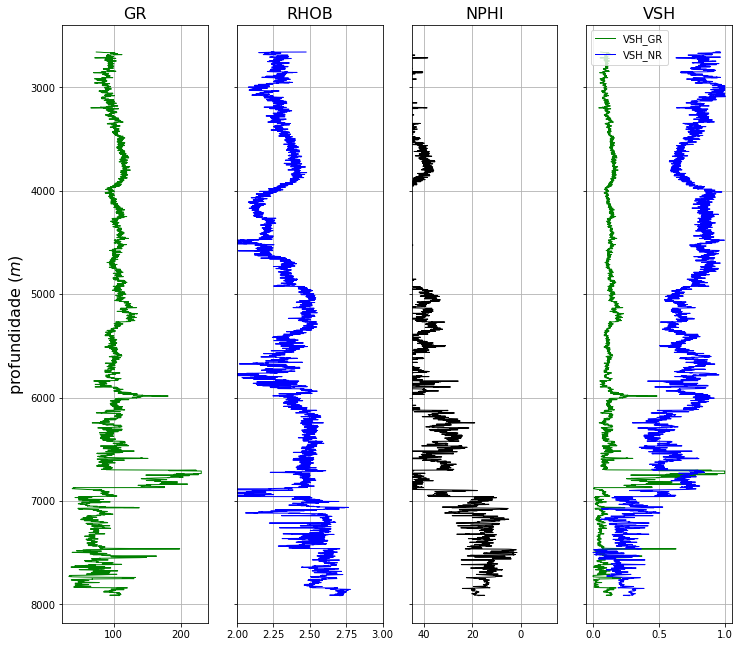

3


In [6]:
teste = curvas('k-means e perceptron/Wells/DrewPt1/LAS/DP1.LAS')
print(len(teste))

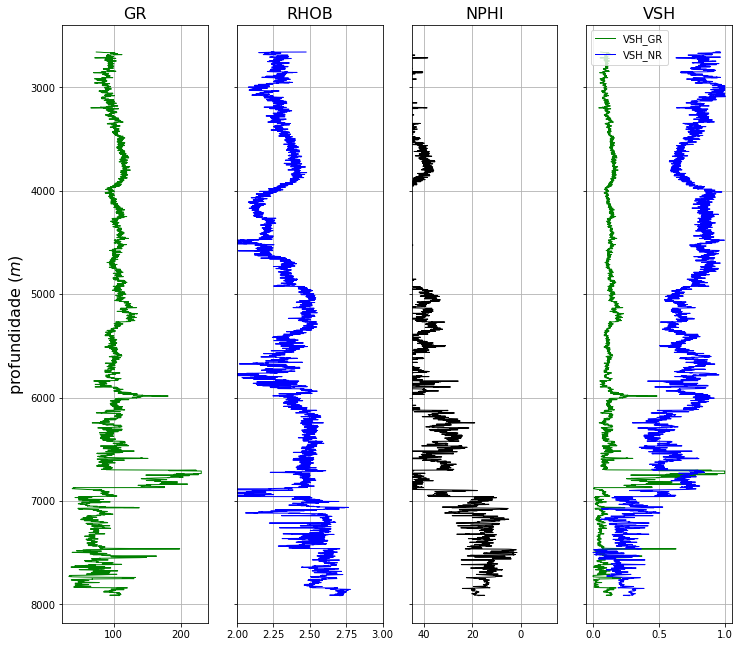

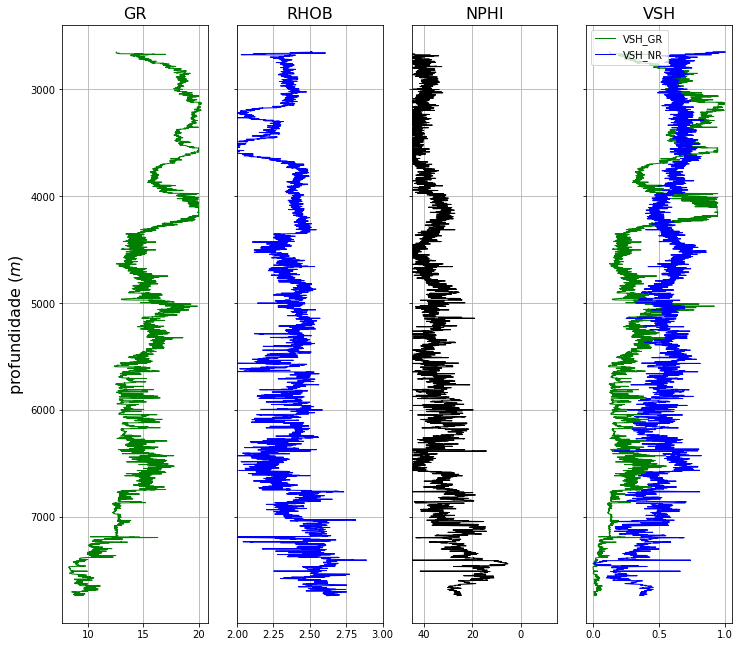

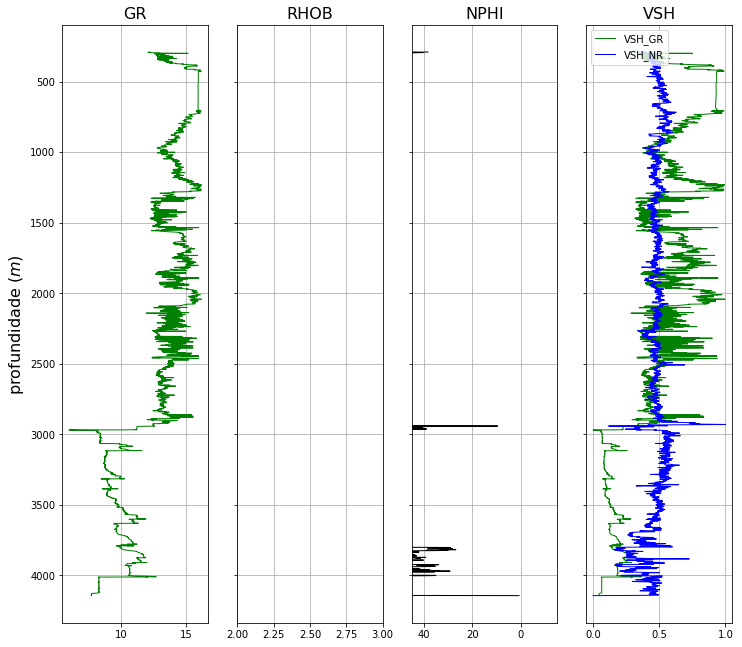

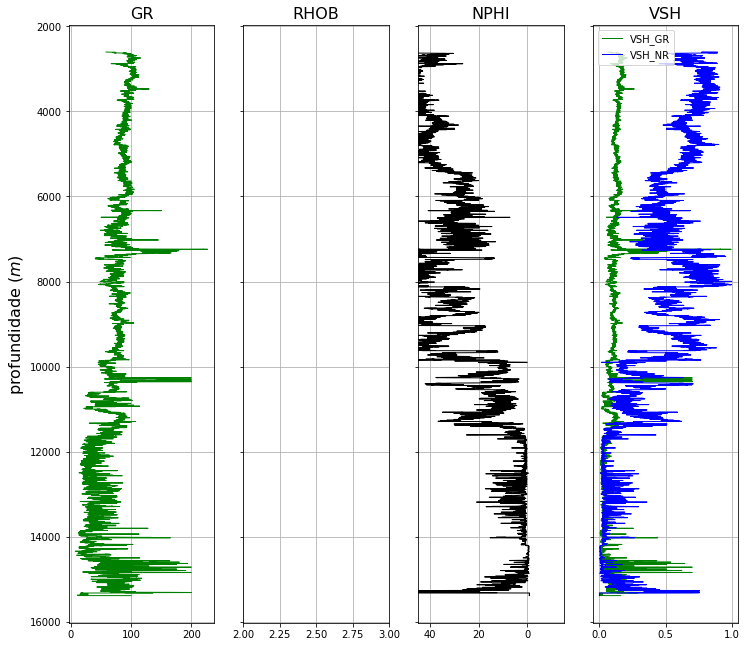

In [16]:
### Preparando os dados para o aprendizado de maquina:

data_DP1 = curvas('k-means e perceptron/Wells/DrewPt1/LAS/DP1.LAS')
data_ES1 = curvas('k-means e perceptron/Wells/ESimp1/LAS/ES1.LAS')
data_WD1 = curvas('k-means e perceptron/Wells/WDease1/LAS/WD1.LAS')
data_IK1 = curvas('k-means e perceptron/Wells/Ikpik1/LAS/IK1.LAS')
#data_IN1 = curvas('k-means e perceptron/Wells/Inigok1/LAS/IN1.LAS') problema
#data_JWD1 = curvas('k-means e perceptron/Wells/JWDalt1/LAS/JWD1.LAS')
#data_NI1 = curvas('k-means e perceptron/Wells/NInigok1/LAS/NI1.LAS')
#data_NK1 = curvas('k-means e perceptron/Wells/NKalik1/LAS/NK1.LAS')
#data_PE1 = curvas('k-means e perceptron/Wells/Peard1/LAS/PE1.LAS')
#data_SM1 = curvas('k-means e perceptron/Wells/SMeade1/LAS/SM1.LAS')


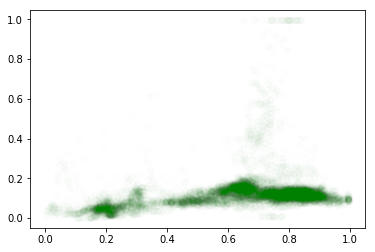

In [18]:
# NOTA:
# data_DP1[1] = VSH_GR
# data_DP1[2] = VSH_ND

# Scatterplot
plt.plot(data_DP1[2],data_DP1[1],'og',alpha=0.009)
plt.show()

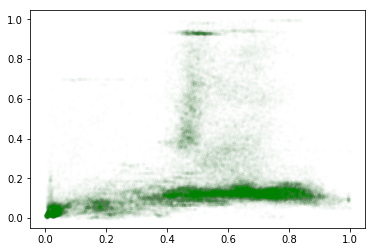

In [17]:
VSH_GR = data_DP1[1] + data_ES1[1] + data_IK1[1] + data_WD1[1]
VSH_ND = data_DP1[2] + data_ES1[2] + data_IK1[2] + data_WD1[2]

# scatterplot
plt.plot(VSH_ND,VSH_GR,'.g',alpha=0.009)
plt.show()